In [125]:
# The Libaries that are used

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange

from collections import defaultdict as dd

import math

In [126]:
traffic_volume = pd.read_csv('Traffic_Volume.csv')

# take only growth and name of LGA
traffic = traffic_volume[['LGA_SHORT_NM','GROWTH_RATE']]

# sums any duplicate LGA's together
summed = traffic.groupby("LGA_SHORT_NM").sum()

# reset the index to merge
summed = summed.reset_index()
#really lazy regex to remove parenthensisisisis
summed['LGA_SHORT_NM'] = summed['LGA_SHORT_NM'].str.replace(r'(', '')
summed['LGA_SHORT_NM'] = summed['LGA_SHORT_NM'].str.replace(r')', '')
summed
#summed.to_csv('traffic.csv', index=False)

,LGA_SHORT_NM,GROWTH_RATE
0,FALLS CREEK,0.024
1,LAKE MOUNTAIN,0.055
2,MOUNT BAW BAW,-0.082
3,MOUNT BULLER,-0.175
4,MOUNT STIRLING,0.030
...,...,...
80,WODONGA,1.098
81,WYNDHAM,6.753
82,YARRA,-1.005
83,YARRA RANGES,6.460


In [127]:
postcodes = pd.read_csv('Australian_Postcodes.csv')

# take only vic postcodes
vic = postcodes.loc[postcodes['state'] == 'VIC']

# only take postcode and suburb
vic = vic.iloc[:, 0:2] 
vic.columns = ['POSTCODE', 'LGA_SHORT_NM']
vic

#vic.to_csv('vic.csv', index=False)

In [128]:
# join the 2 df together
growth_rate = pd.merge(summed, vic, how="left",on=["LGA_SHORT_NM"])

# drop postcodes column as no longer needed
traffic_growth = growth_rate.drop("POSTCODE", axis=1)

#traffic_growth.to_csv('Traffic_Growth.csv', index=False)

# doesn't join all as some of the names are slightly different hMMM
traffic_growth



,LGA_SHORT_NM,GROWTH_RATE
0,FALLS CREEK,0.024
1,LAKE MOUNTAIN,0.055
2,MOUNT BAW BAW,-0.082
3,MOUNT BULLER,-0.175
4,MOUNT STIRLING,0.030
...,...,...
117,WODONGA,1.098
118,WYNDHAM,6.753
119,YARRA,-1.005
120,YARRA RANGES,6.460


In [129]:
population = pd.read_csv("Victorian_Population.csv")

# take relevant columns and rename to match 
population = population[['Local Government Area', '%']]
population.columns = ['LGA_SHORT_NM', 'POP_GROWTH_RATE']

# remove brackets in LGA_SHORT_NM and change to uppercase

population['LGA_SHORT_NM'] = population['LGA_SHORT_NM'].str.upper()
population['LGA_SHORT_NM'] = population['LGA_SHORT_NM'].str.replace(r" \(.*\)","")


# drop empty rows 
population_growth = population.dropna()

#population_growth.to_csv('Population_Growth.csv', index=False)
population_growth

,LGA_SHORT_NM,POP_GROWTH_RATE
1,ALPINE,1.3
2,ARARAT,1.0
3,BALLARAT,1.7
4,BANYULE,0.2
5,BASS COAST,3.1
...,...,...
77,YARRA,1.6
78,YARRA RANGES,0.3
79,YARRIAMBIACK,-0.7
81,UNINCORPORATED VIC,1.5


In [130]:
# merge the population_growth and traffic_grow together

In [131]:
# join the 2 df together
growth_rate = pd.merge(traffic_growth, population_growth, how="right",on=["LGA_SHORT_NM"])

growth_rate = growth_rate.dropna()
growth_rate = growth_rate.drop_duplicates()


# rename GROWTH_RATE TO TRAF_GROWTH_RATE
growth_rate = growth_rate.rename(columns={'GROWTH_RATE': 'TRAF_GROWTH_RATE'})

growth_rate.to_csv('Traffic_over_Pop_Growth.csv', index=False)

# doesn't join all as some of the names are slightly different hMMM
growth_rate


,LGA_SHORT_NM,TRAF_GROWTH_RATE,POP_GROWTH_RATE
0,ALPINE,1.327,1.3
1,ARARAT,0.925,1.0
2,BALLARAT,4.521,1.7
4,BANYULE,0.297,0.2
5,BASS COAST,2.476,3.1
...,...,...,...
102,WODONGA,1.098,1.4
104,WYNDHAM,6.753,4.7
105,YARRA,-1.005,1.6
106,YARRA RANGES,6.460,0.3


In [132]:
# split into 2 dfs

traf_growth_rate = growth_rate.iloc[:, 0:2] 
traf_growth_rate


pop_growth_rate= growth_rate.iloc[:, 0:3:2] 
pop_growth_rate

,LGA_SHORT_NM,POP_GROWTH_RATE
0,ALPINE,1.3
1,ARARAT,1.0
2,BALLARAT,1.7
4,BANYULE,0.2
5,BASS COAST,3.1
...,...,...
102,WODONGA,1.4
104,WYNDHAM,4.7
105,YARRA,1.6
106,YARRA RANGES,0.3


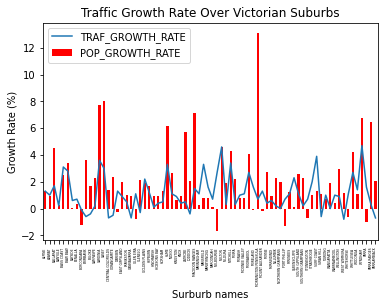

In [138]:
#traf_growth_rate.plot(kind="bar", x="LGA_SHORT_NM", y='TRAF_GROWTH_RATE',color='red')
#pop_growth_rate.plot(kind="bar", x="LGA_SHORT_NM", y='POP_GROWTH_RATE',color='blue')
#plt.show()

ax = traf_growth_rate.plot(kind='bar',x='LGA_SHORT_NM', y='TRAF_GROWTH_RATE',color='red')
pop_growth_rate.plot(ax=ax, x='LGA_SHORT_NM', y='POP_GROWTH_RATE')
plt.title("Traffic Growth Rate Over Victorian Suburbs")
plt.ylabel("Growth Rate (%)")
plt.xlabel("Surburb names")
plt.xticks(x="LGA_SHORT_NM", rotation='vertical')

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=3)

plt.savefig('Traffic_Growth.png',bbox_inches='tight',dpi=150)

